In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# Creating dataframe

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train=pd.read_csv('D:/Train1.txt',sep=',',names=datacols)

In [4]:
test=pd.read_csv('D:/Test1.txt',sep=',',names=datacols)

In [5]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


# Data exploratory analysis

In [7]:
#function for mapping the target variable
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [8]:
# applying the mapping
train['attack_class'] = train['attack'].apply(lambda x: mapping[x])
test['attack_class'] = test['attack'].apply(lambda x: mapping[x])

In [9]:
train.drop(['attack'],axis=1,inplace=True)
test.drop(['attack'],axis=1,inplace=True)

In [10]:
# For train data
train['activity']=train.apply(lambda x: 0.0 if x['attack_class']=='Normal' else(1.0 if x['attack_class']=='Probe' else(2.0 if x['attack_class']=='DoS' else(3.0 if x['attack_class']=='U2R' else 4.0))) ,axis=1)

In [11]:
# for test data
test['activity']=test.apply(lambda x: 0.0 if x['attack_class']=='Normal' else(1.0 if x['attack_class']=='Probe' else(2.0 if x['attack_class']=='DoS' else(3.0 if x['attack_class']=='U2R' else 4.0))) ,axis=1)

In [12]:
# Dropping the unmapped target variable
train.drop(['attack_class'],axis=1,inplace=True)
test.drop(['attack_class'],axis=1,inplace=True)

In [13]:
train.activity.value_counts()

0.0    67343
2.0    45927
1.0    11656
4.0      995
3.0       52
Name: activity, dtype: int64

# It is a highly imbalanced dataset, there is a high difference b/w the lowest and the highest class

In [14]:
train.shape

(125973, 43)

In [15]:
test.shape

(22544, 43)

In [16]:
pandas_profiling.ProfileReport(train)

In [16]:
# Removing on the basis of high cardinality(service) and almost all zeroes from pandas profiling
train.drop(['service','num_root','num_outbound_cmds','num_file_creations','num_failed_logins','num_access_files'],axis=1,inplace=True)
test.drop(['service','num_root','num_outbound_cmds','num_file_creations','num_failed_logins','num_access_files'],axis=1,inplace=True)

In [17]:
# Splitting into numerical and categorical for train data
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64',]]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
train_num=train[numeric_var_names]
train_cat=train[cat_var_names]
# Splitting train into y
train_y=train_num['activity']



In [18]:
# Outlier treatment
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

train_num=train_num.apply(lambda x: outlier_capping(x))

In [19]:

# creating dummy variables
cat_var=pd.get_dummies(train_cat,drop_first=True)
train_y.value_counts()

0.0    67343
2.0    45927
1.0    11656
4.0      995
3.0       52
Name: activity, dtype: int64

In [20]:
# concatinating the num and cat variables
final_train=pd.concat([train_num,cat_var],axis=1)


In [21]:
# For test data
numeric_var_names=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64',]]
cat_var_names=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
test_num=test[numeric_var_names]
test_cat=test[cat_var_names]
#Splitting in y
test_y=test_num['activity']
test_num=test_num.drop(['activity'],axis=1)

In [22]:
# outlier treatment
test_num=test_num.apply(lambda x: outlier_capping(x))

In [23]:
# Creating dummy variables
cat_var1=pd.get_dummies(test_cat,drop_first=True)

In [24]:
# concatinating the numerical and categorical values
final_test=pd.concat([test_num,cat_var1],axis=1)
test_y.value_counts()

0.0    9711
2.0    7458
4.0    2754
1.0    2421
3.0     200
Name: activity, dtype: int64

In [25]:
train_x=final_train.drop(['activity'],axis=1)

# Checking importance of features using Random forest

In [26]:
rfc=RandomForestClassifier()

In [30]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

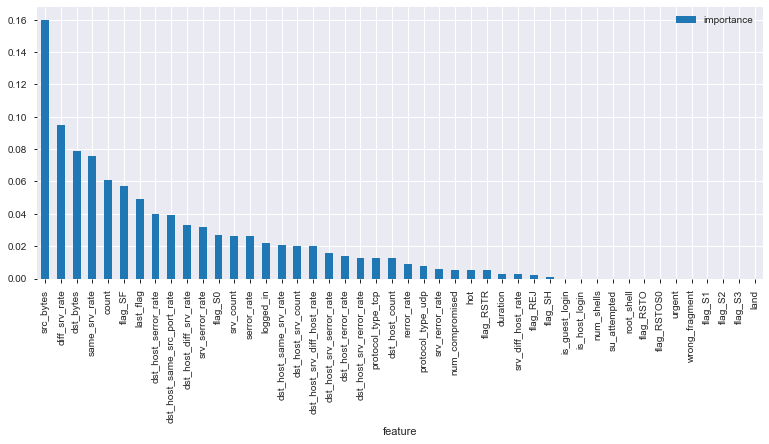

In [31]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (13,5)
importances.plot.bar()

# Using RFE for feature engineering

In [32]:
# Using RFE
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [35]:
# the selected features
selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'last_flag',
 'flag_SF']

# VIF for multicollinearity

In [26]:
rf_features=['src_bytes',
 'dst_bytes',
 'count',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'last_flag',
 'flag_SF']

In [42]:
features = "+".join(rf_features)

In [43]:
y, X = dmatrices('activity~' + features,final_train, return_type='dataframe')

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [45]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,131.355526,Intercept
9,2.835327,flag_SF
7,2.516521,dst_host_serror_rate
5,1.569335,dst_host_diff_srv_rate
3,1.449657,count
6,1.410700,dst_host_same_src_port_rate
4,1.395513,diff_srv_rate
8,1.312726,last_flag
2,1.132406,dst_bytes
1,1.119994,src_bytes


In [27]:
# Final train data
train_X=train_x[rf_features]


In [28]:
# Splitting the test data
test_X=final_test[rf_features]


# Now we will try to make the dataset more balanced

In [29]:
# smote for balacing data
smote=SMOTE(sampling_strategy='not majority')

In [30]:
Train_X1,Train_y1=smote.fit_sample(train_X,train_y)

In [53]:
Train_y1.value_counts()

1.0    67343
3.0    67343
4.0    67343
2.0    67343
0.0    67343
Name: activity, dtype: int64

# Using logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Grid Search
param_grid={'C':[0.001,0.01,0.1,1,10,100]}

In [33]:
logreg=GridSearchCV(LogisticRegression(max_iter=15000,multi_class='ovr'),param_grid,cv=5,verbose=5,n_jobs=-1,scoring='accuracy')

In [58]:
logreg.fit(Train_X1,Train_y1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  5.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.2min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=15000, multi_class='ovr'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=5)

In [59]:
# best score
logreg.best_score_

0.8619604116240737

In [60]:
# best param
logreg.best_params_

{'C': 0.001}

In [68]:
# building model with best param
logmodel=LogisticRegression(C=0.001,multi_class='ovr',max_iter=1000)

In [69]:
# training the model
logmodel.fit(Train_X1,Train_y1)

LogisticRegression(C=0.001, max_iter=1000, multi_class='ovr')

# Evaluation metrics

In [70]:
# accuracy
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Train_y1, logmodel.predict(Train_X1)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, logmodel.predict(test_X)))

The overall accuracy score for the Train Data is :  0.8895505100752862
The overall accuracy score for the Test Data  is :  0.7783445706174592


In [71]:
# confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,logmodel.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,logmodel.predict(test_X))

In [72]:
# for train
print(confusion_matrix_train)

[[61705  2423  2605   209   401]
 [   81 11191    30    15   339]
 [ 1458   782 42772    85   830]
 [    0     0     1    39    12]
 [   28    11    57    32   867]]


In [73]:
# for test
print(confusion_matrix_test)

[[8752  222  485  193   59]
 [   6 1934  352  108   21]
 [1110  205 5608   37  498]
 [   0   22   88   81    9]
 [ 614  191  205  572 1172]]


In [74]:
# classification report for train
print(metrics.classification_report(Train_y1,logmodel.predict(Train_X1)))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     67343
         1.0       0.94      0.96      0.95     67343
         2.0       0.89      0.93      0.91     67343
         3.0       0.95      0.75      0.84     67343
         4.0       0.76      0.89      0.82     67343

    accuracy                           0.89    336715
   macro avg       0.90      0.89      0.89    336715
weighted avg       0.90      0.89      0.89    336715



In [75]:
# classification report for test
print(metrics.classification_report(test_y,logmodel.predict(test_X)))


              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      9711
         1.0       0.75      0.80      0.77      2421
         2.0       0.83      0.75      0.79      7458
         3.0       0.08      0.41      0.14       200
         4.0       0.67      0.43      0.52      2754

    accuracy                           0.78     22544
   macro avg       0.63      0.66      0.62     22544
weighted avg       0.80      0.78      0.78     22544



# Using Random Forest

In [34]:
# Grid Search
param_grid={'n_estimators':[5,10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy'],'max_depth':list(range(3,11)),'max_features':list(range(3,10))}

In [35]:
rf_mod=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy',verbose=5,n_jobs=-1)

In [36]:
rf_mod.fit(Train_X1,Train_y1)

Fitting 5 folds for each of 1232 candidates, totalling 6160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 106.3min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 136.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 171.3min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 211.7min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 238.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=5)

In [37]:
# best score 
rf_mod.best_score_

0.9982952942399359

In [38]:
# best params
rf_mod.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 7,
 'n_estimators': 100}

In [39]:
# building the model with best params
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features=7)

In [40]:
rf.fit(Train_X1,Train_y1)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=7)

# Evaluation Metrics

In [41]:
# accuracy
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Train_y1, rf.predict(Train_X1)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, rf.predict(test_X)))

The overall accuracy score for the Train Data is :  0.9986101005301219
The overall accuracy score for the Test Data  is :  0.7609119943222143


In [42]:
# confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,rf.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,rf.predict(test_X))

In [43]:
# for train
print(confusion_matrix_train)

[[67116   156     5     6    60]
 [    9 11644     0     3     0]
 [   14     7 45900     0     6]
 [    0     0     0    52     0]
 [    0     0     1     2   992]]


In [44]:
# for test
print(confusion_matrix_test)

[[9379  213   45   51   23]
 [ 529 1729  156    5    2]
 [1461  354 5637    1    5]
 [  88   41    4   52   15]
 [1423  488   51  435  357]]


In [45]:
# classification report for train
print(metrics.classification_report(Train_y1,rf.predict(Train_X1)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343
         2.0       1.00      1.00      1.00     67343
         3.0       1.00      1.00      1.00     67343
         4.0       1.00      1.00      1.00     67343

    accuracy                           1.00    336715
   macro avg       1.00      1.00      1.00    336715
weighted avg       1.00      1.00      1.00    336715



In [46]:
#classification report for test
print(metrics.classification_report(test_y,rf.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83      9711
         1.0       0.61      0.71      0.66      2421
         2.0       0.96      0.76      0.84      7458
         3.0       0.10      0.26      0.14       200
         4.0       0.89      0.13      0.23      2754

    accuracy                           0.76     22544
   macro avg       0.66      0.57      0.54     22544
weighted avg       0.81      0.76      0.74     22544



# Using Naive Bayes

In [76]:
import sklearn.naive_bayes as nb

In [77]:
naivemodel=nb.GaussianNB()

In [78]:
naivemodel.fit(Train_X1,Train_y1)

GaussianNB()

# Evaluation metrics

In [79]:
# accuracy
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Train_y1, naivemodel.predict(Train_X1)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, naivemodel.predict(test_X)))

The overall accuracy score for the Train Data is :  0.7398363601265165
The overall accuracy score for the Test Data  is :  0.7558552164655784


In [80]:
#Confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,naivemodel.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,naivemodel.predict(test_X))

In [81]:
# for train
print(confusion_matrix_train)

[[52722 11198  2096    77  1250]
 [   53  9335     2   310  1956]
 [   43  4123 40692    46  1023]
 [    0     1     0    36    15]
 [    0    15     3   522   455]]


In [82]:
# for test
print(confusion_matrix_test)

[[8148 1374   52   24  113]
 [   1 1877  162   27  354]
 [ 169 1350 5158  108  673]
 [   0   89    0    0  111]
 [ 200  523    0  174 1857]]


In [83]:
#classification report for train
print(metrics.classification_report(Train_y1,naivemodel.predict(Train_X1)))

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.88     67343
         1.0       0.74      0.80      0.77     67343
         2.0       0.96      0.89      0.92     67343
         3.0       0.58      0.78      0.67     67343
         4.0       0.52      0.44      0.48     67343

    accuracy                           0.74    336715
   macro avg       0.76      0.74      0.74    336715
weighted avg       0.76      0.74      0.74    336715



In [84]:
#classification report for test
print(metrics.classification_report(test_y,naivemodel.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      9711
         1.0       0.36      0.78      0.49      2421
         2.0       0.96      0.69      0.80      7458
         3.0       0.00      0.00      0.00       200
         4.0       0.60      0.67      0.63      2754

    accuracy                           0.76     22544
   macro avg       0.57      0.60      0.56     22544
weighted avg       0.84      0.76      0.78     22544



# Here logistic regression is the best as the recall value for it is higher than the recall values for the other models